Precision: 0.7407
Recall: 0.8696
F1-score: 0.8000


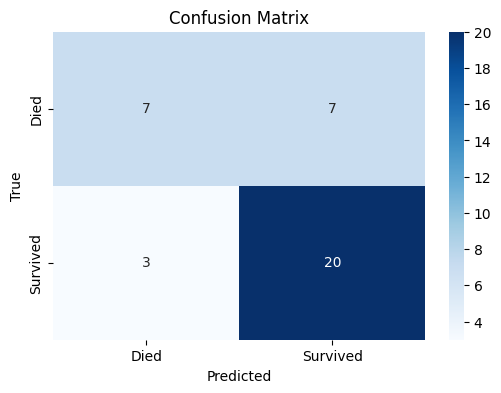

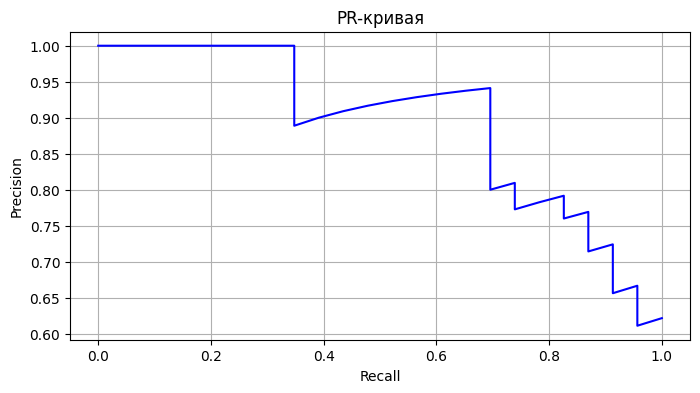

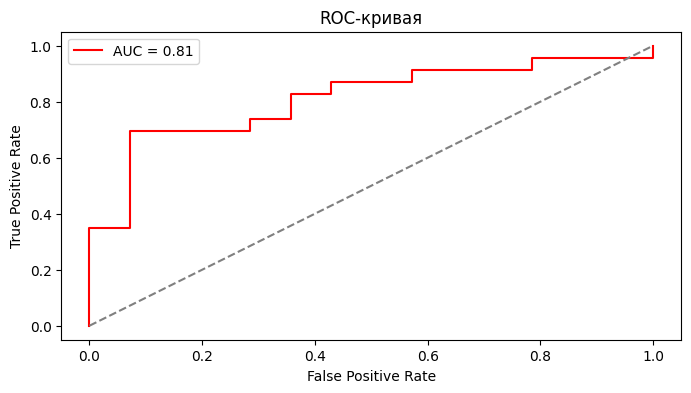

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, precision_recall_curve, roc_curve, auc, 
    precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns

titanic = pd.read_csv("Titanic.csv")
titanic = titanic.dropna()
titanic = titanic.drop(columns=["Name", "Ticket", "Cabin", "PassengerId"])
titanic["Sex"] = titanic["Sex"].map({"male": 0, "female": 1})
titanic["Embarked"] = titanic["Embarked"].map({"C": 1, "Q": 2, "S": 3})

X = titanic.drop(columns=["Survived"])
y = titanic["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 1. Precision, Recall, F1
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# 2. Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Died", "Survived"], 
            yticklabels=["Died", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# 3. PR-кривая
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(8, 4))
plt.plot(recall_curve, precision_curve, color="blue")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR-кривая")
plt.grid()
plt.show()

# 4. ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color="red", label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.legend()
plt.show()

Модель логистической регрессии показывает хорошую способность предсказывать выживших (Recall = 0.87), но страдает от ложноположительных прогнозов (Precision = 0.75).


Logistic Regression


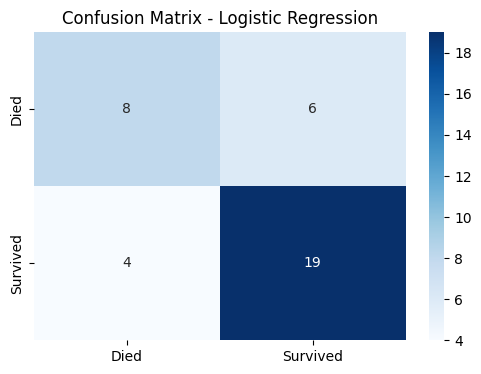

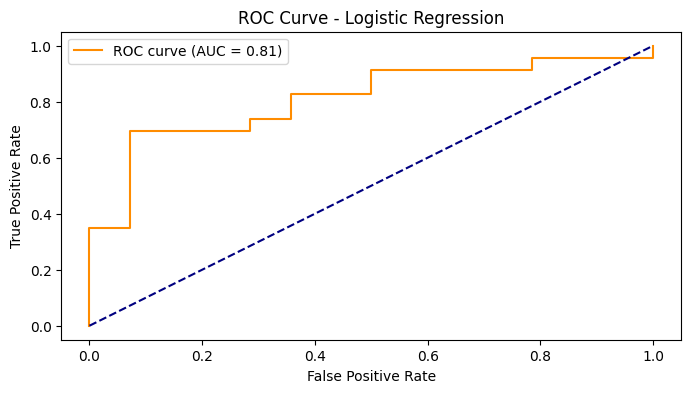

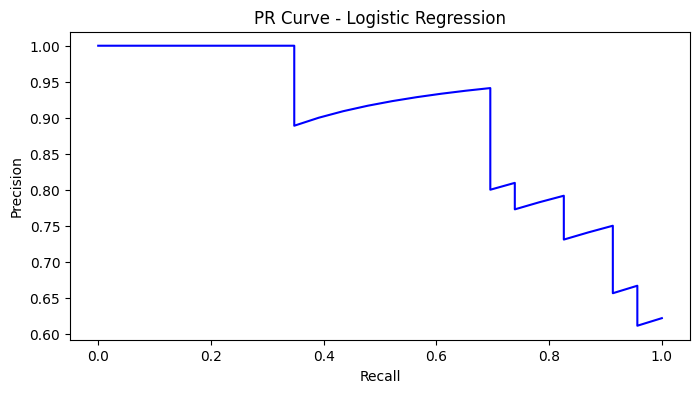


SVM


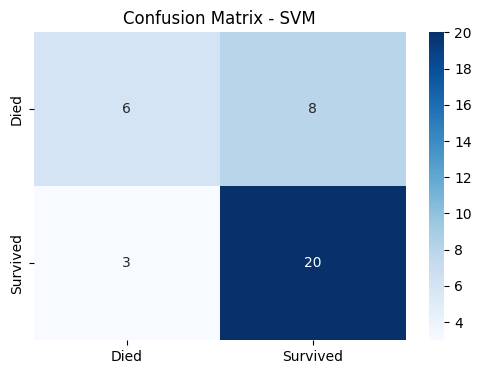

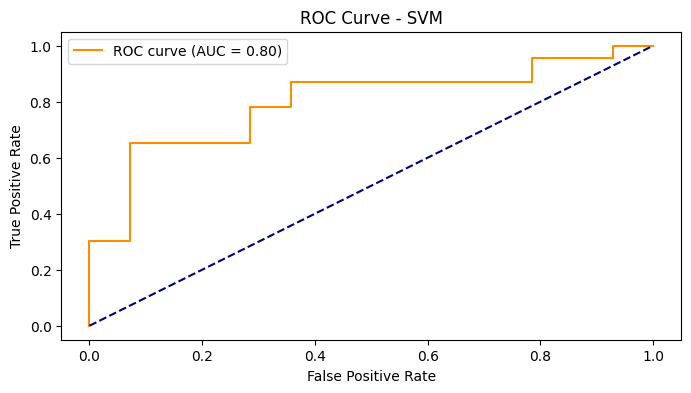

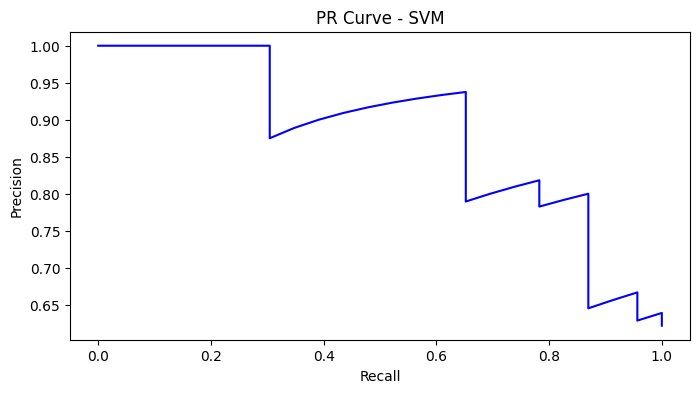


KNN


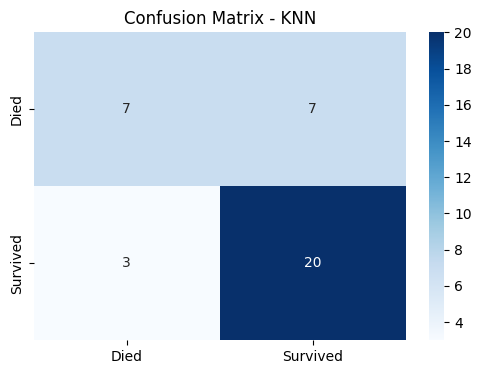

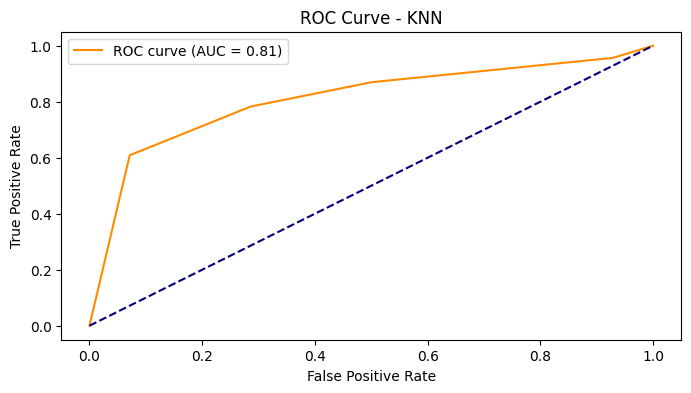

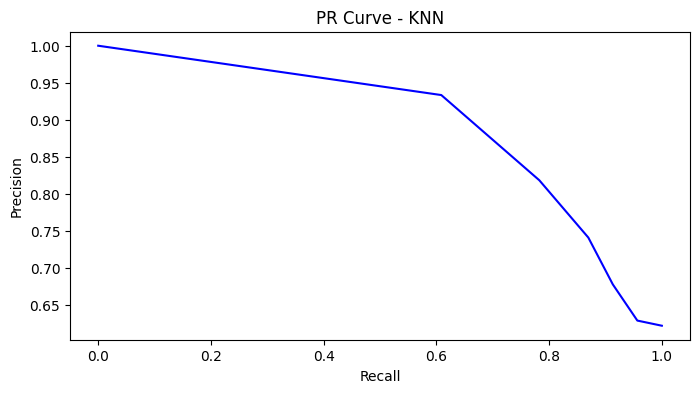



=== Сравнение ===

Logistic Regression:
Accuracy: 0.7297
Precision: 0.7600
Recall: 0.8261
F1: 0.7917

SVM:
Accuracy: 0.7027
Precision: 0.7143
Recall: 0.8696
F1: 0.7843

KNN:
Accuracy: 0.7297
Precision: 0.7407
Recall: 0.8696
F1: 0.8000

Лучшая модель - KNN с F1: 0.8000


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, confusion_matrix, roc_curve, auc, 
                            precision_recall_curve)

titanic = pd.read_csv('Titanic.csv')
titanic = titanic.dropna()
titanic = titanic.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic['Embarked'] = titanic['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})

X = titanic.drop(columns=['Survived'])
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Функция для оценки моделей
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)
    
    # Метрики
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred)
    }
    
    # Матрица ошибок
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Died', 'Survived'], 
                yticklabels=['Died', 'Survived'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    
    # ROC-кривая
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()
    
    # PR-кривая
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.figure(figsize=(8, 4))
    plt.plot(recall, precision, color='blue')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'PR Curve - {model_name}')
    plt.show()
    
    return metrics

# Инициализация моделей
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=0),
    'SVM': SVC(probability=True, random_state=0),
    'KNN': KNeighborsClassifier()
}

# Оценка моделей
results = {}
for name, model in models.items():
    print(f'\n{"="*50}\n{name}\n{"="*50}')
    if name == 'Logistic Regression':
        metrics = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, name)
    else:
        metrics = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, name)
    results[name] = metrics

# Сравнение результатов
print('\n\n=== Сравнение ===')
for model_name, metrics in results.items():
    print(f'\n{model_name}:')
    for metric_name, value in metrics.items():
        print(f'{metric_name}: {value:.4f}')

# Вывод наилучшей модели
best_model = max(results.items(), key=lambda x: x[1]['F1'])
print(f'\nЛучшая модель - {best_model[0]} с F1: {best_model[1]["F1"]:.4f}')